In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as exp    
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
 15  groos     7668 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 958.6+ KB


In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,46998772
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,58853106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,538375067
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,83453539
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,39846344


In [21]:
# create year correct 
df['year correct'] = df['released'].str.extract(pat ='([0-9]{4})')
df.sample(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos,year correct
3192,The Apostle,PG-13,Drama,1997,"February 20, 1998 (United States)",7.2,14000.0,Robert Duvall,Robert Duvall,Robert Duvall,United States,5000000,19868354,Butcher's Run Films,134.0,19868354,1998
5530,It's Complicated,R,Comedy,2009,"December 25, 2009 (United States)",6.5,88000.0,Nancy Meyers,Nancy Meyers,Meryl Streep,United States,85000000,219103655,Universal Pictures,120.0,219103655,2009
3881,Jurassic Park III,PG-13,Action,2001,"July 18, 2001 (United States)",5.9,301000.0,Joe Johnston,Michael Crichton,Sam Neill,United States,93000000,368780809,Universal Pictures,92.0,368780809,2001
92,Indiana Jones and the Raiders of the Lost Ark,PG,Action,1981,"June 12, 1981 (United States)",8.4,905000.0,Steven Spielberg,Lawrence Kasdan,Harrison Ford,United States,18000000,389925971,Paramount Pictures,115.0,389925971,1981
719,Tampopo,Not Rated,Comedy,1985,September 1987 (United States),8.0,17000.0,Jûzô Itami,Jûzô Itami,Ken Watanabe,Japan,0,444213,Itami Productions,114.0,444213,1987
2462,Street Fighter,PG-13,Action,1994,"December 23, 1994 (United States)",4.0,67000.0,Steven E. de Souza,Steven E. de Souza,Jean-Claude Van Damme,Japan,35000000,99431786,Capcom Entertainment,102.0,99431786,1994
3215,Going All the Way,R,Comedy,1997,"September 19, 1997 (United States)",5.7,1800.0,Mark Pellington,Dan Wakefield,Jeremy Davies,United States,0,113069,Lakeshore Entertainment,103.0,113069,1997
804,Head Office,PG-13,Comedy,1985,"January 3, 1986 (United States)",5.4,1400.0,Ken Finkleman,Ken Finkleman,Judge Reinhold,United States,0,3393807,Guber-Peters Company,90.0,3393807,1986
3005,The Great White Hype,R,Comedy,1996,"May 3, 1996 (United States)",5.5,8500.0,Reginald Hudlin,Tony Hendra,Samuel L. Jackson,United States,0,8008255,Atman Entertainment,91.0,8008255,1996
2079,Home Alone 2: Lost in New York,PG,Adventure,1992,"November 20, 1992 (United States)",6.8,318000.0,Chris Columbus,John Hughes,Macaulay Culkin,United States,28000000,358994850,Twentieth Century Fox,120.0,358994850,1992


In [22]:
df.sort_values(by=["gross"]  , inplace=False , ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos,year correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2847246203,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2797501328,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,2201647264,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2069521700,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2048359754,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,0,1990


In [85]:
# to see all the data
pd.set_option('display.max_rows' , None)
## df.sort_values(by=["gross"]  , inplace=False , ascending=False)

In [87]:
# drop any duplicated 
df['company'].drop_duplicates().sort_values(ascending=False)

7129    2384
5664    2383
6412    2382
4007    2381
6793    2380
6420    2379
3776    2378
524     2377
3330    2376
146     2375
2213    2374
6222    2373
3368    2372
535     2371
5180    2370
3193    2369
1321    2368
1329    2367
789     2366
5125    2365
5499    2364
4618    2363
4990    2362
5410    2361
7576    2360
3310    2359
6798    2358
6265    2357
4392    2356
4999    2355
425     2354
712     2353
3158    2352
3637    2351
2173    2350
4272    2349
450     2348
3624    2347
3943    2346
2084    2345
818     2344
2355    2343
6606    2342
5276    2341
7032    2340
4863    2339
2194    2338
4572    2337
6616    2336
1306    2335
1475    2334
5715    2333
1421    2332
1744    2331
1304    2330
7225    2329
5496    2328
6672    2327
5395    2326
4557    2325
4505    2324
7267    2323
2284    2322
6578    2321
317     2320
0       2319
7401    2318
40      2317
403     2316
117     2315
5075    2314
729     2313
4975    2312
6166    2311
5272    2310
5409    2309
7625    2308

In [33]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos,year correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,46998772,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,58853106,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,538375067,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,83453539,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,39846344,1980


## Budget and company high correlation

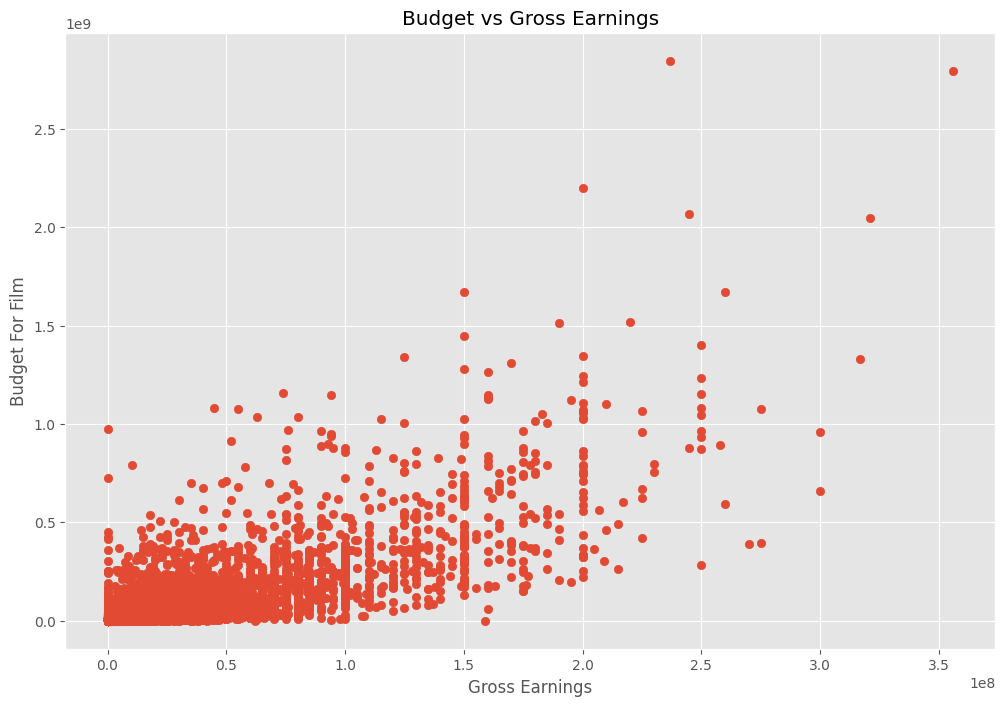

In [37]:
# scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'] );
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget For Film")
plt.show()

In [38]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos,year correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,46998772,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,58853106,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,538375067,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,83453539,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,39846344,1980


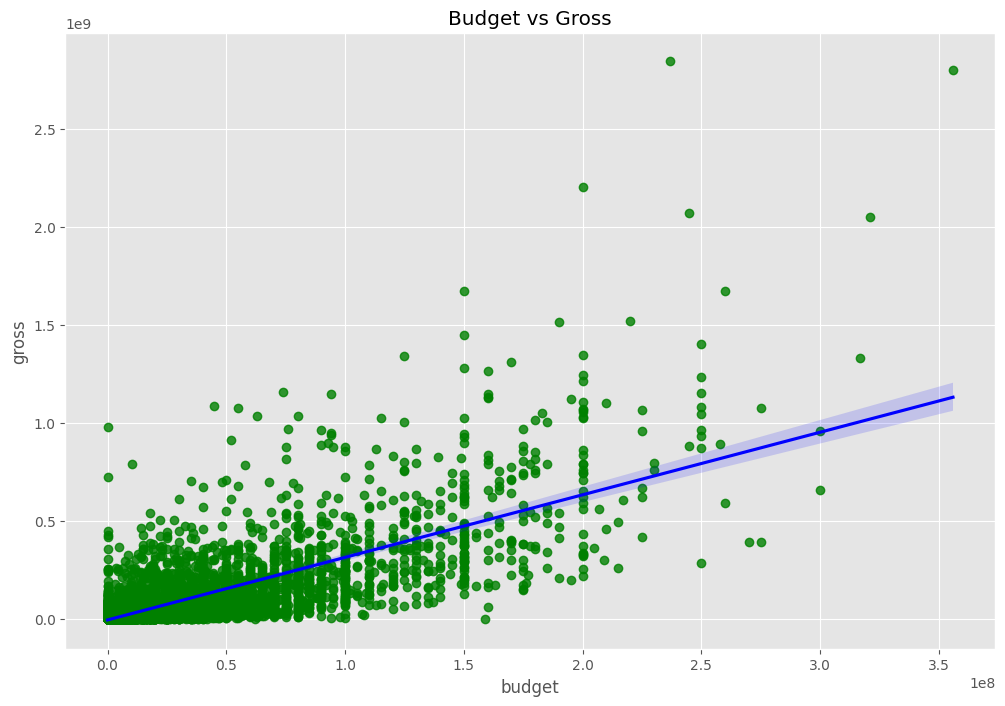

In [49]:
# plot budget vs groos using seaborn
sns.regplot(x='budget', y='gross', data=df , scatter_kws={"color":"green"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross');

In [55]:
# start looking at correlation
df_numeric = df.select_dtypes(include=[np.number]).astype(float)
df_numeric = df_numeric.interpolate()
correlation_matrix = df_numeric.corr()
df_numeric.corr()

,year,score,votes,budget,gross,runtime,groos
year,1.000000,0.097130,0.222427,0.309212,0.261900,0.120760,0.261900
score,0.097130,1.000000,0.409263,0.055931,0.186529,0.399309,0.186529
votes,0.222427,0.409263,1.000000,0.486931,0.632870,0.309132,0.632870
budget,0.309212,0.055931,0.486931,1.000000,0.750157,0.269424,0.750157
gross,0.261900,0.186529,0.632870,0.750157,1.000000,0.245199,1.000000
runtime,0.120760,0.399309,0.309132,0.269424,0.245199,1.000000,0.245199
groos,0.261900,0.186529,0.632870,0.750157,1.000000,0.245199,1.000000


In [58]:
df_numeric.corr(method="pearson")

,year,score,votes,budget,gross,runtime,groos
year,1.000000,0.097130,0.222427,0.309212,0.261900,0.120760,0.261900
score,0.097130,1.000000,0.409263,0.055931,0.186529,0.399309,0.186529
votes,0.222427,0.409263,1.000000,0.486931,0.632870,0.309132,0.632870
budget,0.309212,0.055931,0.486931,1.000000,0.750157,0.269424,0.750157
gross,0.261900,0.186529,0.632870,0.750157,1.000000,0.245199,1.000000
runtime,0.120760,0.399309,0.309132,0.269424,0.245199,1.000000,0.245199
groos,0.261900,0.186529,0.632870,0.750157,1.000000,0.245199,1.000000


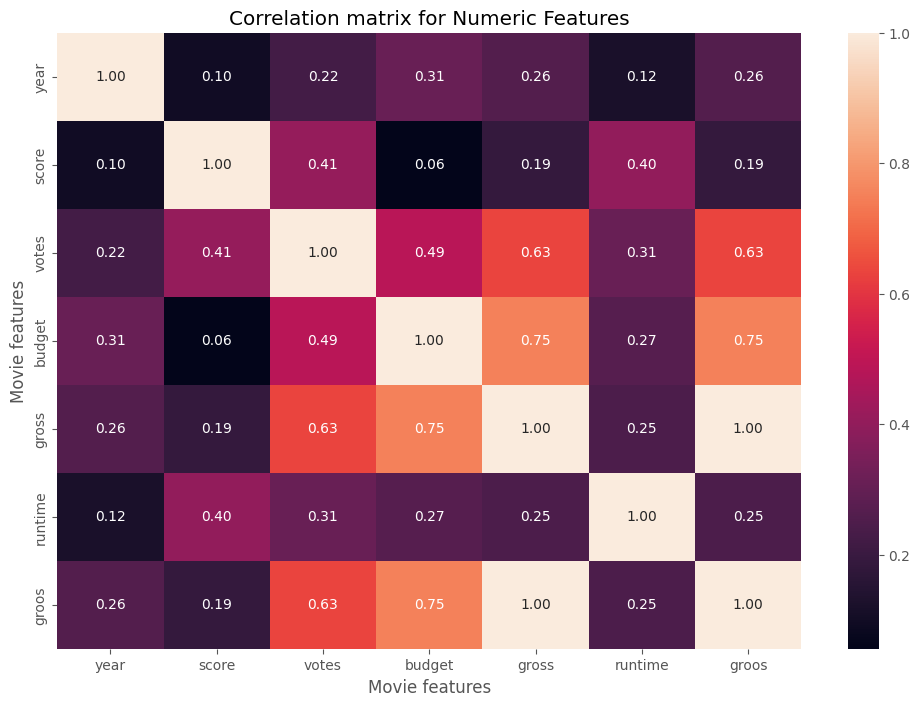

In [73]:
correlation_matrix = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True , fmt='0.2f')
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [65]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos,year correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,46998772,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,58853106,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,538375067,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,83453539,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,39846344,1980


In [69]:
df_numerized = df 
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype("category")
        df_numerized[col_name]=  df_numerized[col_name].cat.codes  
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos,year correct
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,46998772,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,58853106,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,538375067,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,83453539,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,39846344,0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,-1,95.0,39754601,0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,115229890,0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,23402427,0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,108185706,1
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,15795189,0


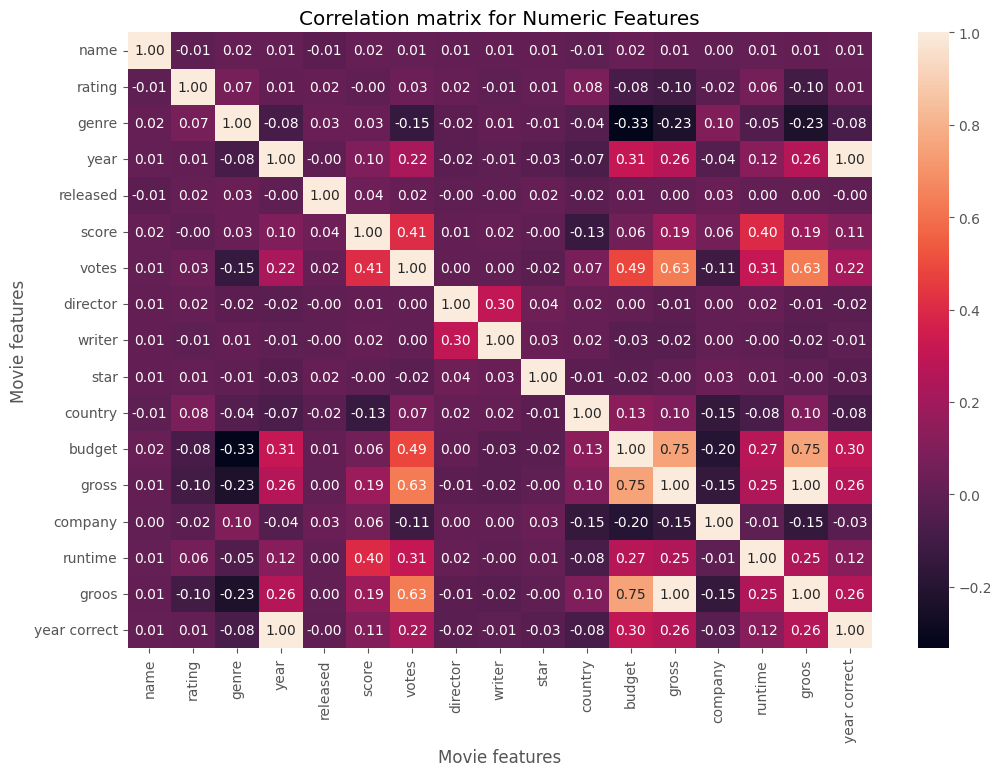

In [72]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True ,fmt='0.2f')
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [74]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,groos,year correct
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.000961,0.010392,0.006989,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.018387,0.062145,-0.095450,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,0.099779,-0.052711,-0.234297,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.038516,0.120811,0.261900,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,0.028690,0.000868,0.000519,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.059243,0.399451,0.186392,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,-0.109982,0.309212,0.632834,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004740,0.017624,-0.014916,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.002383,-0.003511,-0.022997,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.025543,0.010174,-0.001129,-0.027606


In [76]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack
corr_pairs

<bound method DataFrame.unstack of                   name    rating     genre      year  released     score  \
name          1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating       -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre         0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year          0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released     -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score         0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes         0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director      0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer        0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star          0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country      -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget        0.020548 -0.081939 -0.334021  0.309212 

In [77]:
sorted_pairs = corr_pairs().sort_values()
sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
gross         genre          -0.234297
genre         groos          -0.234297
              gross          -0.234297
groos         genre          -0.234297
company       budget         -0.201700
budget        company        -0.201700
country       company        -0.150228
company       country        -0.150228
groos         company        -0.149630
gross         company        -0.149630
company       groos          -0.149630
              gross          -0.149630
votes         genre          -0.145307
genre         votes          -0.145307
score         country        -0.133348
country       score          -0.133348
company       votes          -0.109982
votes         company        -0.109982
gross         rating         -0.095450
groos         rating         -0.095450
rating        groos          -0.095450
              gross          -0.095450
              budget         -0.081939
budget        rating     

In [78]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes         gross           0.632834
groos         votes           0.632834
gross         votes           0.632834
votes         groos           0.632834
budget        gross           0.750157
groos         budget          0.750157
budget        groos           0.750157
gross         budget          0.750157
year correct  year            0.996397
year          year correct    0.996397
name          name            1.000000
writer        writer          1.000000
groos         gross           1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
groos         groos           1.000000
director      director        1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
              groos           1.000000
company       company    

# Votes and budgets have the highest correlation to gross earnings

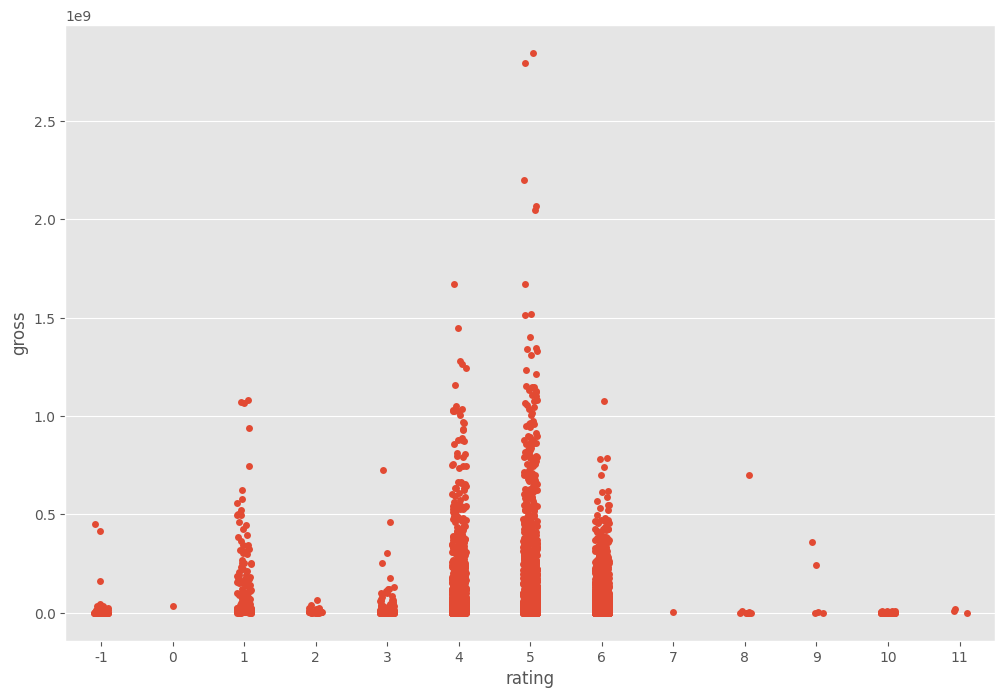

In [81]:
sns.stripplot(x="rating", y="gross", data=df);